<a href="https://colab.research.google.com/github/202218031/DM_Project_1/blob/main/T04_CP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# **Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/diamonds.csv")

# **About Dataset**

**Description of the features**



  ID: A unique identifier for each diamond.

  cut: The quality of the diamond's cut, which can take values like "Excellent," "Very Good," and others.

  color: The color grade of the diamond, typically represented as a letter (e.g., 'E').

  clarity: The clarity of the diamond, describing the presence of internal and external flaws. It uses terms like 'VVS2' to indicate Very, Very Slightly Included 2.

  carat_weight: The weight of the diamond in carats, which is a measure of its size.

  cut_quality: A quality measure related to the cut of the diamond.

  lab: The laboratory that graded the diamond (e.g., 'IGI').

  symmetry: Symmetry quality of the diamond.

  polish: Polish quality of the diamond.

  eye_clean: Indicates whether the diamond is 'clean' to the naked eye.

  culet_size: Size of the culet (a facet at the bottom of the diamond's pavilion).

  culet_condition: Condition of the culet.

  depth_percent: The depth percentage of the diamond.

  table_percent: The table percentage of the diamond.

  meas_length: Measurement length of the diamond.

  meas_width: Measurement width of the diamond.

  meas_depth: Measurement depth of the diamond.

  girdle_min: Minimum girdle size.

  girdle_max: Maximum girdle size.

  fluor_color: Fluorescence color of the diamond.

  fluor_intensity: Intensity of fluorescence.

  fancy_color_dominant_color: Dominant color if it's a fancy colored diamond.

  fancy_color_secondary_color: Secondary color if it's a fancy colored diamond.

  fancy_color_overtone: Overtone of the fancy color.

  fancy_color_intensity: Intensity of the fancy color.

  total_sales_price: The total sales price of the diamond.



**Nominal Attributes:** 'cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity'

**Continuous Quantitative Attributes:** 'carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'total_sales_price'

# **Task 1 (a) : Summary of the dataset**

## What is the size of data?

In [4]:
df.shape

(219703, 26)

Our dataset contains 219703 rows and 26 columns.

## How does the data look like?

In [5]:
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


## What are the datatypes of columns?

In [6]:
df.dtypes

Unnamed: 0                       int64
cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price        

In this dataset, there are 3 types of datatypes present: int64, object and float64.

## Does the data contain missing values?

In [7]:
print(df.isnull().sum())

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


It shows no null values when we use isnull() function. But we can see when we use head() function that our dataset contains values like 'unknown' and 'None' instead of null values.

## Are there any duplicates?

In [8]:
df.duplicated().sum()

0

## How does the data look like mathematically?

In [9]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


The describe() function gives statistical values of the numerical columns in the dataset. It includes mean, standard deviation, minimum and maximum of that column, first, second and third quartile.

## What are the number of unique values in each column?

In [10]:
df.nunique()

Unnamed: 0                     219703
cut                                11
color                              11
clarity                            11
carat_weight                      878
cut_quality                         6
lab                                 3
symmetry                            5
polish                              5
eye_clean                           5
culet_size                          9
culet_condition                     4
depth_percent                     534
table_percent                     235
meas_length                      1415
meas_width                       1155
meas_depth                        852
girdle_min                         10
girdle_max                         10
fluor_color                         6
fluor_intensity                     8
fancy_color_dominant_color         13
fancy_color_secondary_color        11
fancy_color_overtone                9
fancy_color_intensity              10
total_sales_price               22202
dtype: int64

## Summary of Each Attribute

In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

None

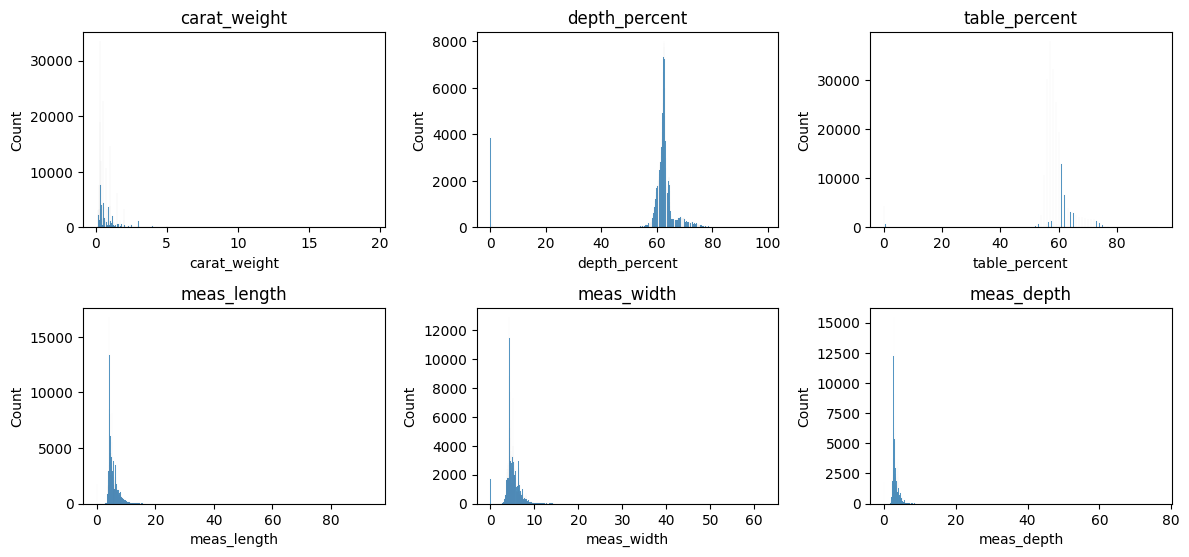

In [12]:
numerical_columns = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column])
    plt.title(f'{column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Insights:**

Carat weight is between 0-5

Length , width and depth is mostly between 5-10

<Figure size 1200x800 with 0 Axes>

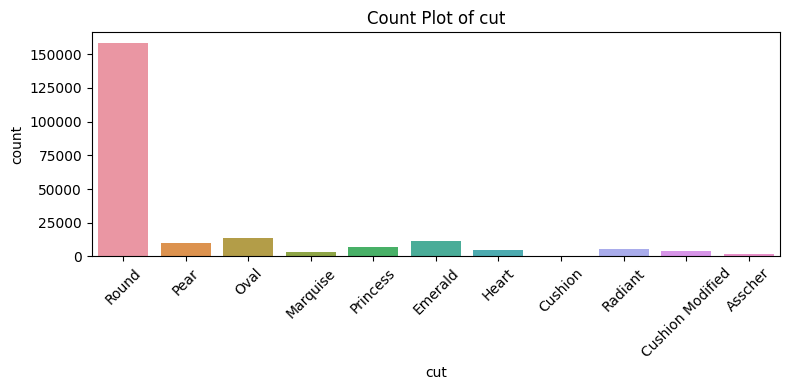

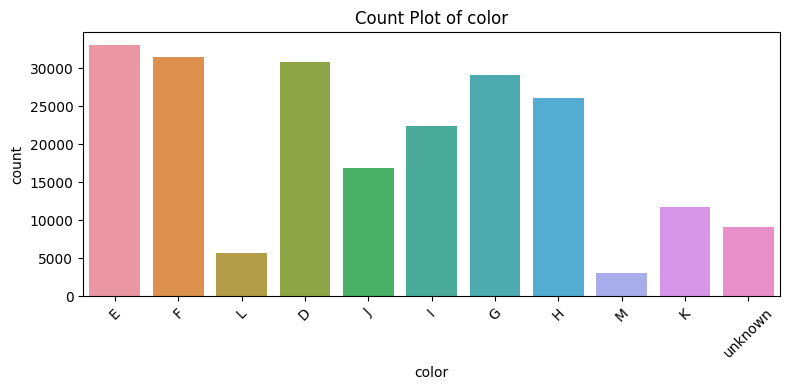

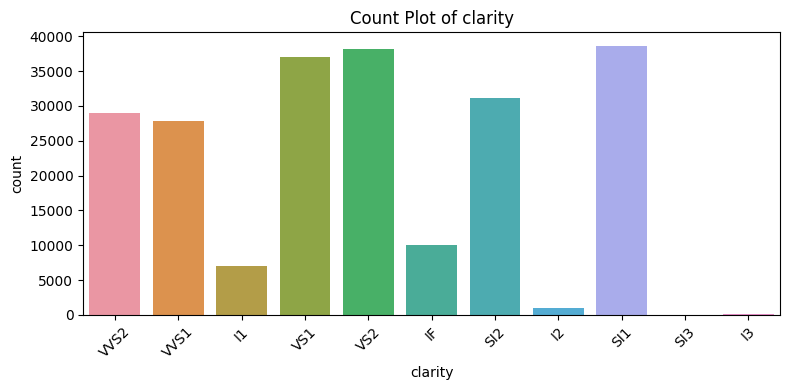

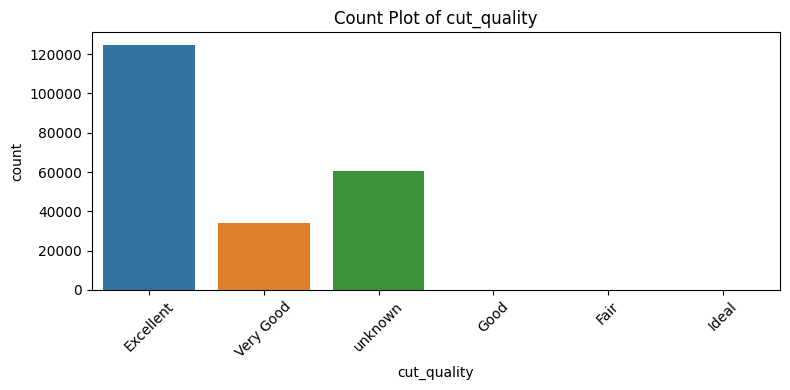

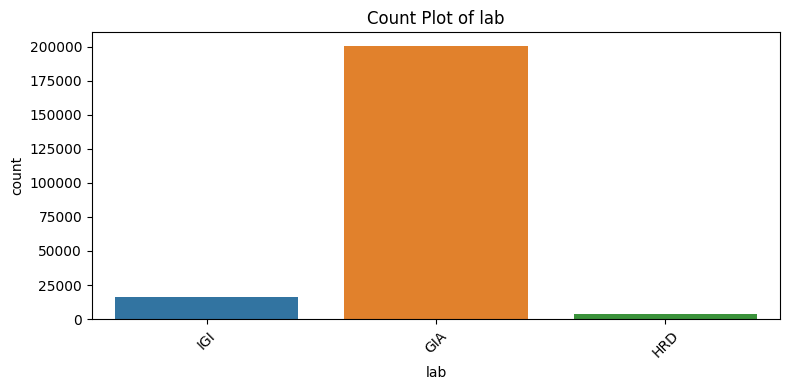

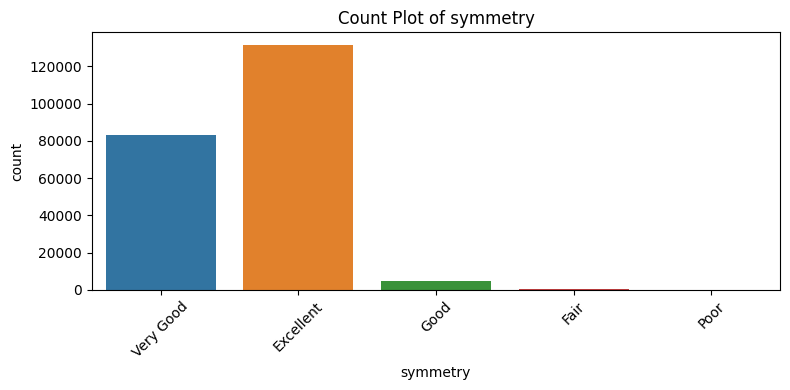

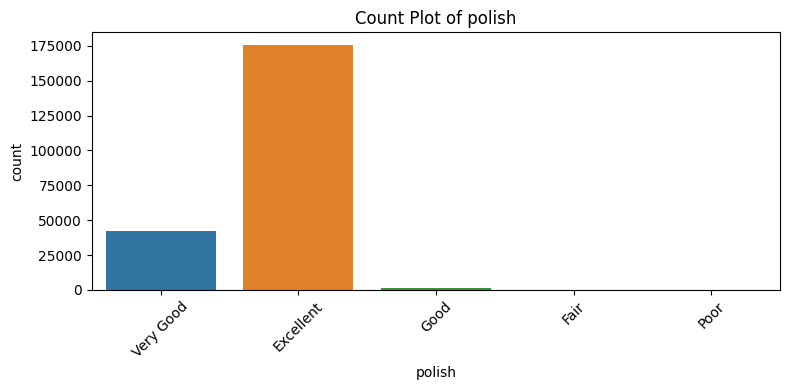

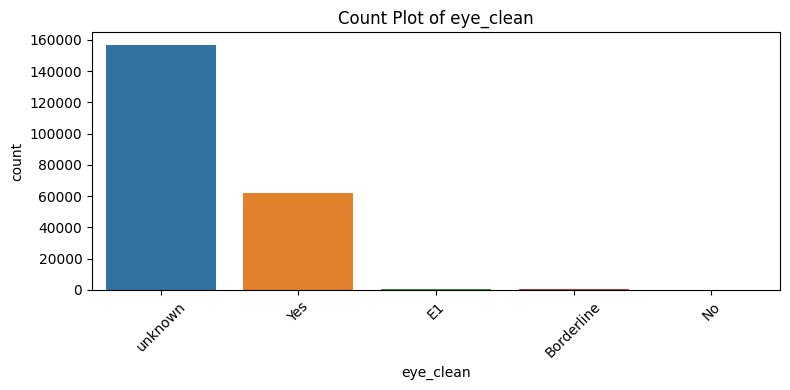

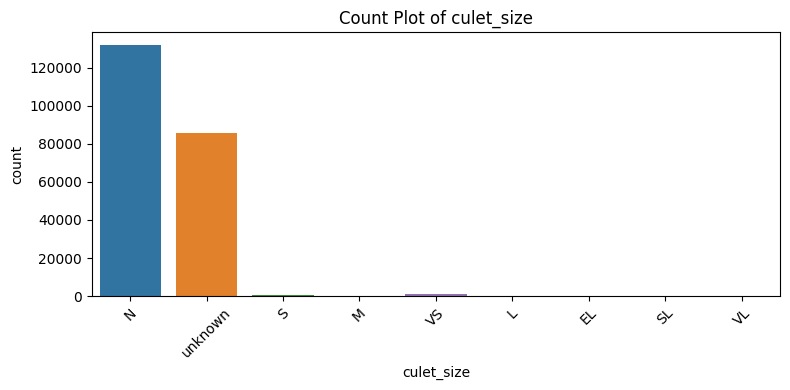

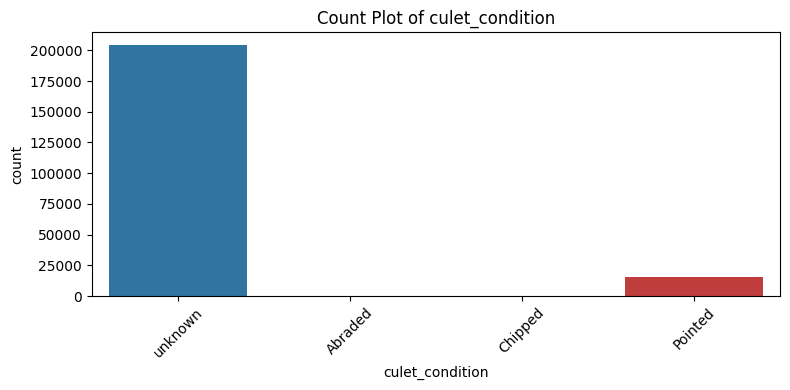

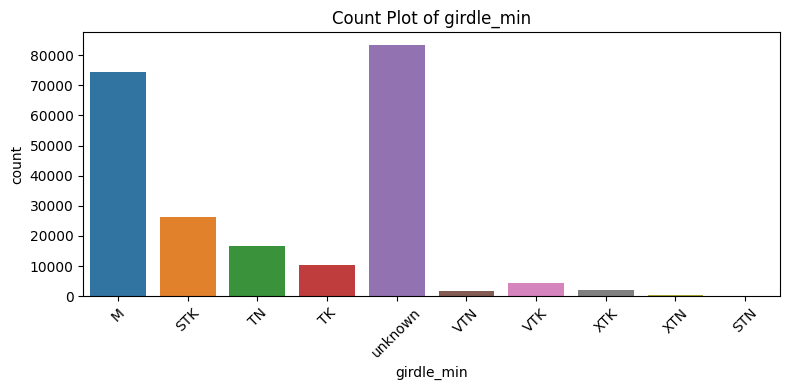

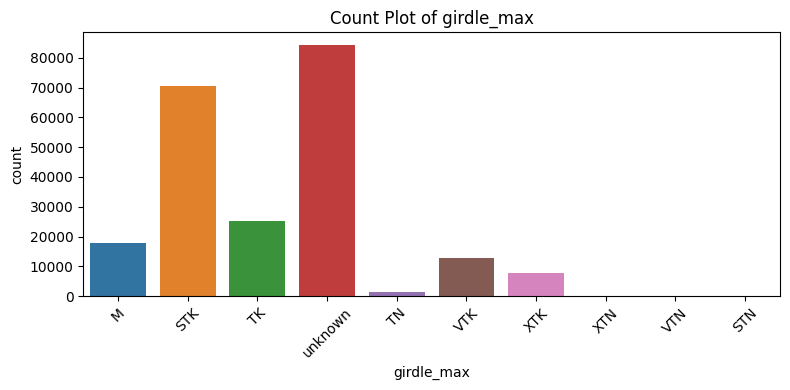

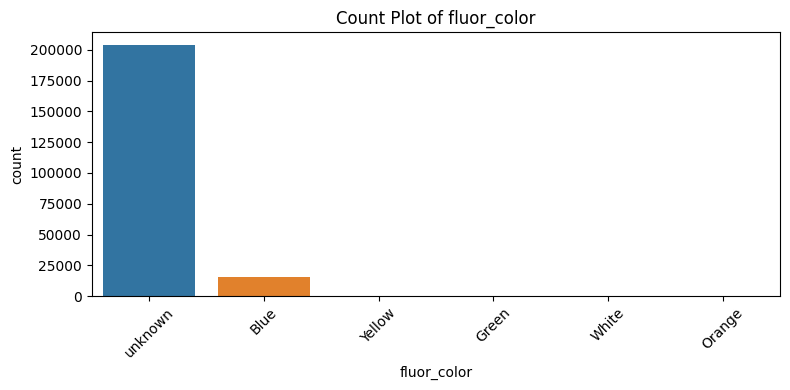

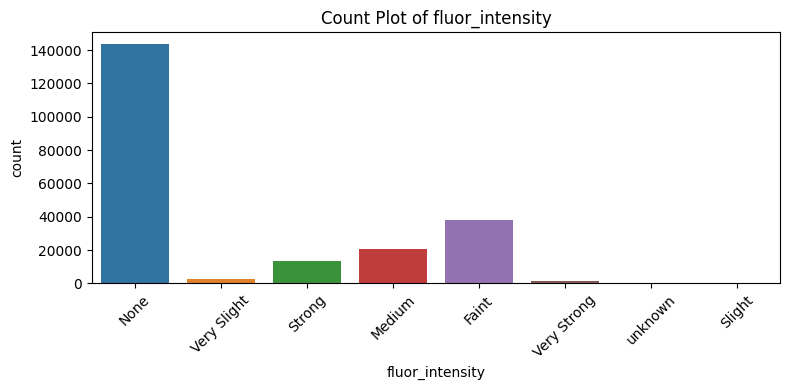

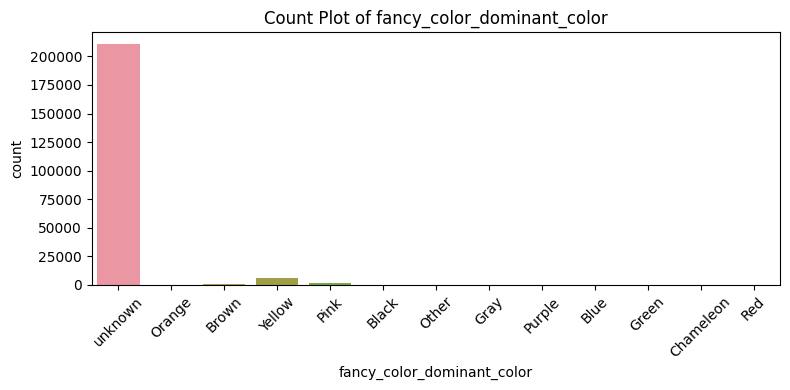

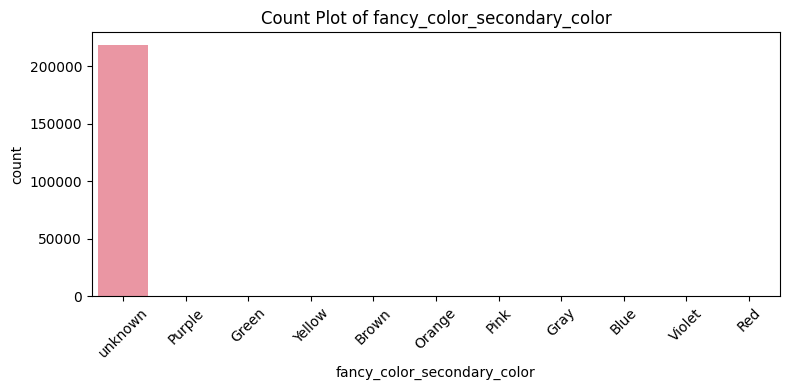

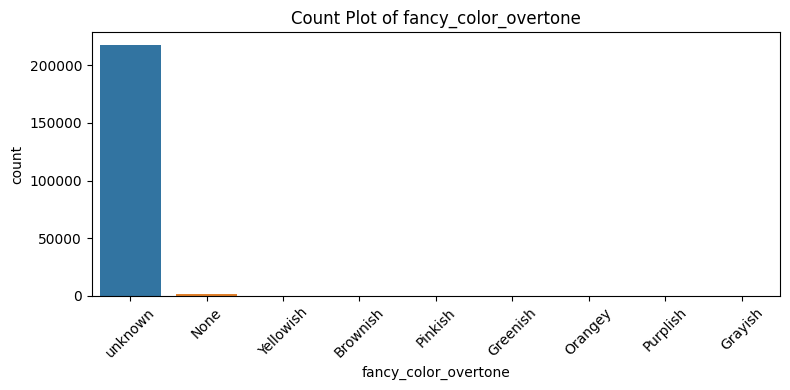

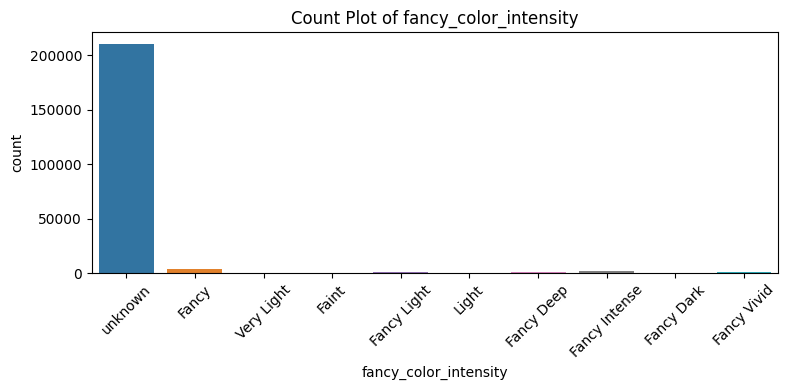

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 8))
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

**Insights**:

The number of unknown values in different categorical varibales is relatively high.

In [14]:
for column_name, column in df.iteritems():
    if column.dtype == 'object':
        value_counts = column.value_counts()
        total_count = len(column)

        print(f'Frequency and Percentage Distribution of unique values in categorical column "{column_name}":')
        for value, count in value_counts.items():
            percentage = (count / total_count) * 100
            print(f'{value}: {count} ({percentage:.2f}%)')
        print()

<ipython-input-14-b0129a8acb4e>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column in df.iteritems():


Frequency and Percentage Distribution of unique values in categorical column "cut":
Round: 158316 (72.06%)
Oval: 13857 (6.31%)
Emerald: 11091 (5.05%)
Pear: 9860 (4.49%)
Princess: 7050 (3.21%)
Radiant: 5630 (2.56%)
Heart: 4774 (2.17%)
Cushion Modified: 3984 (1.81%)
Marquise: 2916 (1.33%)
Asscher: 1696 (0.77%)
Cushion: 529 (0.24%)

Frequency and Percentage Distribution of unique values in categorical column "color":
E: 33103 (15.07%)
F: 31566 (14.37%)
D: 30873 (14.05%)
G: 29184 (13.28%)
H: 26073 (11.87%)
I: 22364 (10.18%)
J: 16898 (7.69%)
K: 11750 (5.35%)
unknown: 9162 (4.17%)
L: 5683 (2.59%)
M: 3047 (1.39%)

Frequency and Percentage Distribution of unique values in categorical column "clarity":
SI1: 38627 (17.58%)
VS2: 38173 (17.37%)
VS1: 36956 (16.82%)
SI2: 31105 (14.16%)
VVS2: 28985 (13.19%)
VVS1: 27877 (12.69%)
IF: 9974 (4.54%)
I1: 6961 (3.17%)
I2: 944 (0.43%)
I3: 91 (0.04%)
SI3: 10 (0.00%)

Frequency and Percentage Distribution of unique values in categorical column "cut_quality":
E

**Insights**:

There are some columns in which the percentage of unknown values is more than 90%. So we might have to drop these columns for better analysis.

# **Task 1 (b). Data Visualization, summarizing insights about the dataset through EDA.**

<ipython-input-15-e830f7314c6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


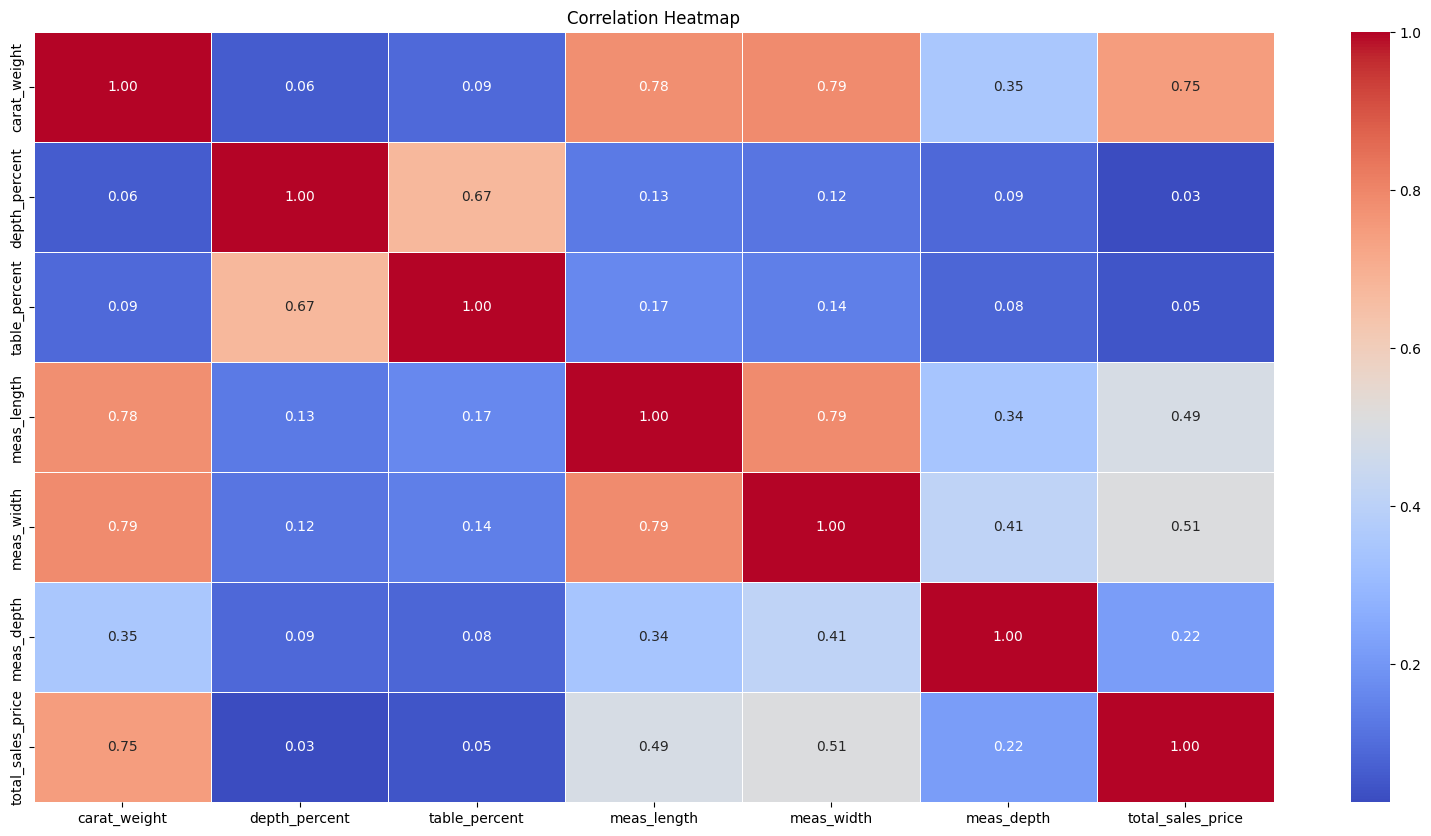

In [15]:
df = df.drop(df.columns[0], axis=1)
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Insights**:

We drop the first column which is Unnamed and acts as an index before plotting the correlation heatmap.

We can see that meas_length and meas_width are highly correlated with carat_weight.

Also the table_percent and depth_percent are correlated.

We also note that total_sales_price is highly correlated with carat_weight.

## Diamond Count by Carat Weight

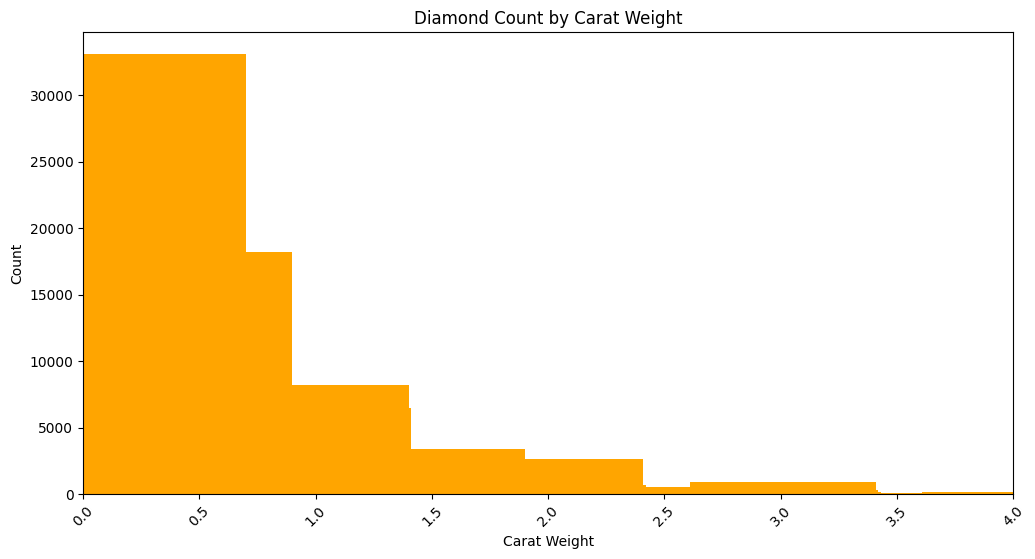

In [16]:
carat_counts = df['carat_weight'].value_counts().reset_index()
carat_counts.columns = ['carat_weight', 'count']
carat_counts = carat_counts.sort_values(by='carat_weight')
plt.figure(figsize=(12, 6))
plt.bar(carat_counts['carat_weight'], carat_counts['count'], color='orange')
plt.title('Diamond Count by Carat Weight')
plt.xlabel('Carat Weight')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xlim(0, 4)
plt.show()

**Insights:**

There is a negative correlation between Carat Weight and the Count of the diamonds.


The number of diamonds corresponding to Carat Weight decreases as the Carat Weight increases.

## Scatter Plot of Carat Weight vs Total Sales Price

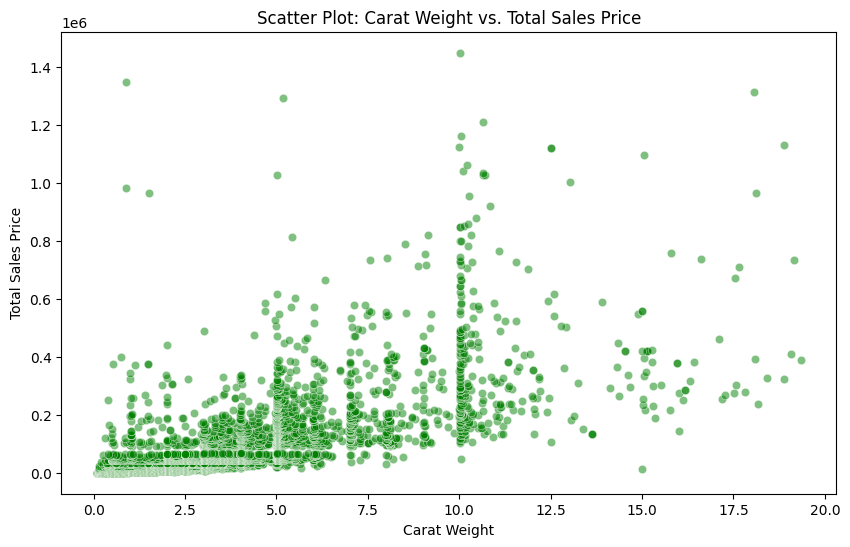

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat_weight', y='total_sales_price', data=df, alpha=0.5, color ="green")
plt.title('Scatter Plot: Carat Weight vs. Total Sales Price')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.show()

**Insights**:

There is somewhat positive correlation between Carat Weight and Total Sales Price. As the Carat Weight increases, the Total Sales Price increases as well.

## Box plot of Carat Weight vs Cut

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Round'),
  Text(1, 0, 'Pear'),
  Text(2, 0, 'Oval'),
  Text(3, 0, 'Marquise'),
  Text(4, 0, 'Princess'),
  Text(5, 0, 'Emerald'),
  Text(6, 0, 'Heart'),
  Text(7, 0, 'Cushion'),
  Text(8, 0, 'Radiant'),
  Text(9, 0, 'Cushion Modified'),
  Text(10, 0, 'Asscher')])

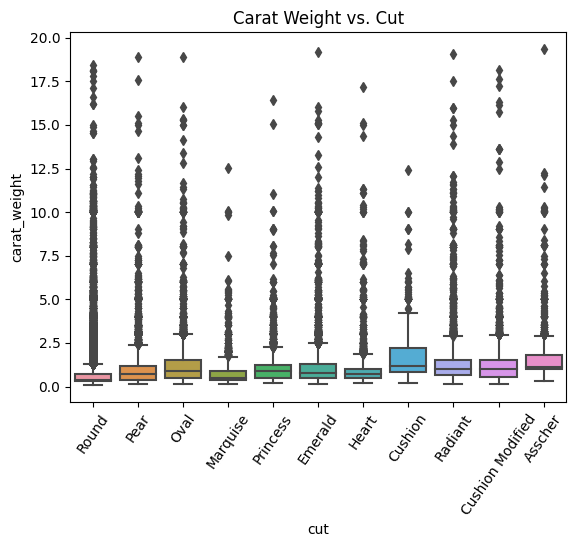

In [18]:
sns.boxplot(x='cut', y='carat_weight', data=df)
plt.title('Carat Weight vs. Cut')
plt.xticks(rotation=55)

## Box plot of Carat Weight vs Color

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'F'),
  Text(2, 0, 'L'),
  Text(3, 0, 'D'),
  Text(4, 0, 'J'),
  Text(5, 0, 'I'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'M'),
  Text(9, 0, 'K'),
  Text(10, 0, 'unknown')])

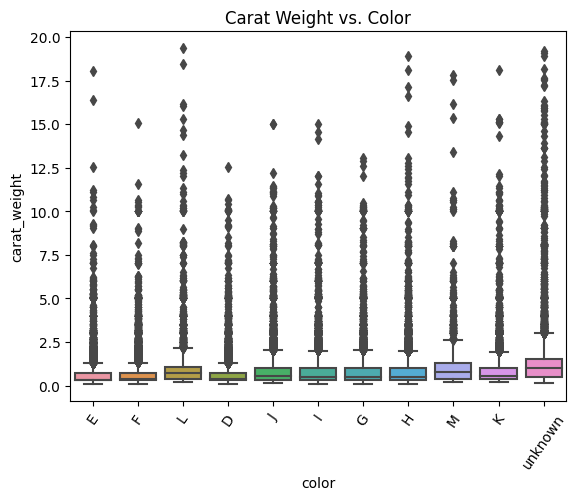

In [19]:
sns.boxplot(x='color', y='carat_weight', data=df)
plt.title('Carat Weight vs. Color')
plt.xticks(rotation=55)

## Box plot of Carat Weight vs Clarity

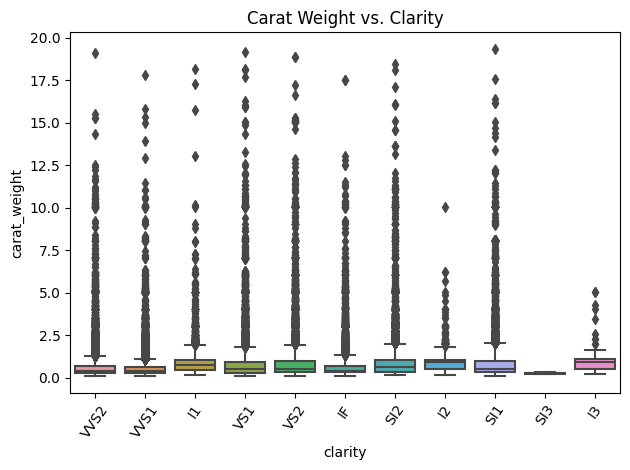

In [20]:
sns.boxplot(x='clarity', y='carat_weight', data=df)
plt.title('Carat Weight vs. Clarity')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

# **T2. Identify and list regression problems on your assigned dataset. Which one does seem the most interesting to you and why?**

*   **Predicting price of diamond**:

  Predicting diamond prices is intriguing due to its significant economic effect. Precise cost predictions help consumers and the diamond firms by directing trade strategies and buying decisions.



*   **Predicting carat weight of diamond**:

  Predicting accurate carat weight helps buyers make informed decisions about the size and value of a diamond.



*   **Predicting price per carat weight of diamond:**

  Estimating the price per carat weight helps consumers to assess the cost-effectiveness of a diamond, ensuring they receive fair pricing for the diamond's size and quality. It is essential for investors to manage risk and make the best investment choices in the diamond market.

# **T3. Build an end-to-end Machine Learning pipeline**

# **Dataset Preprocessing**

## Dropping columns that contain more than 20 % of 'unknown' values

In [21]:
threshold = 20
unknown_percentage = (df == 'unknown').mean() * 100
columns_to_drop = unknown_percentage[unknown_percentage >= threshold].index
print(columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

Index(['cut_quality', 'eye_clean', 'culet_size', 'culet_condition',
       'girdle_min', 'girdle_max', 'fluor_color', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity'],
      dtype='object')


## Dropping columns that contain more than 20 % of 'None' values

In [22]:
threshold = 20
None_percentage = (df == 'None').mean() * 100
columns_to_drop = None_percentage[None_percentage >= threshold].index
print(columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

Index(['fluor_intensity'], dtype='object')


Here the threshold = 20 specifies columns that contain more than 20% of 'Unknown' or 'None' values. We further go onto to dropping those columns as they may not provide meaningful information for analysis or modeling.

We keep the other columns with unknown values as it is as the number of unknown values is relatively smaller compared to total dataset size and are manageable.

## Detecting and Handling Outliers

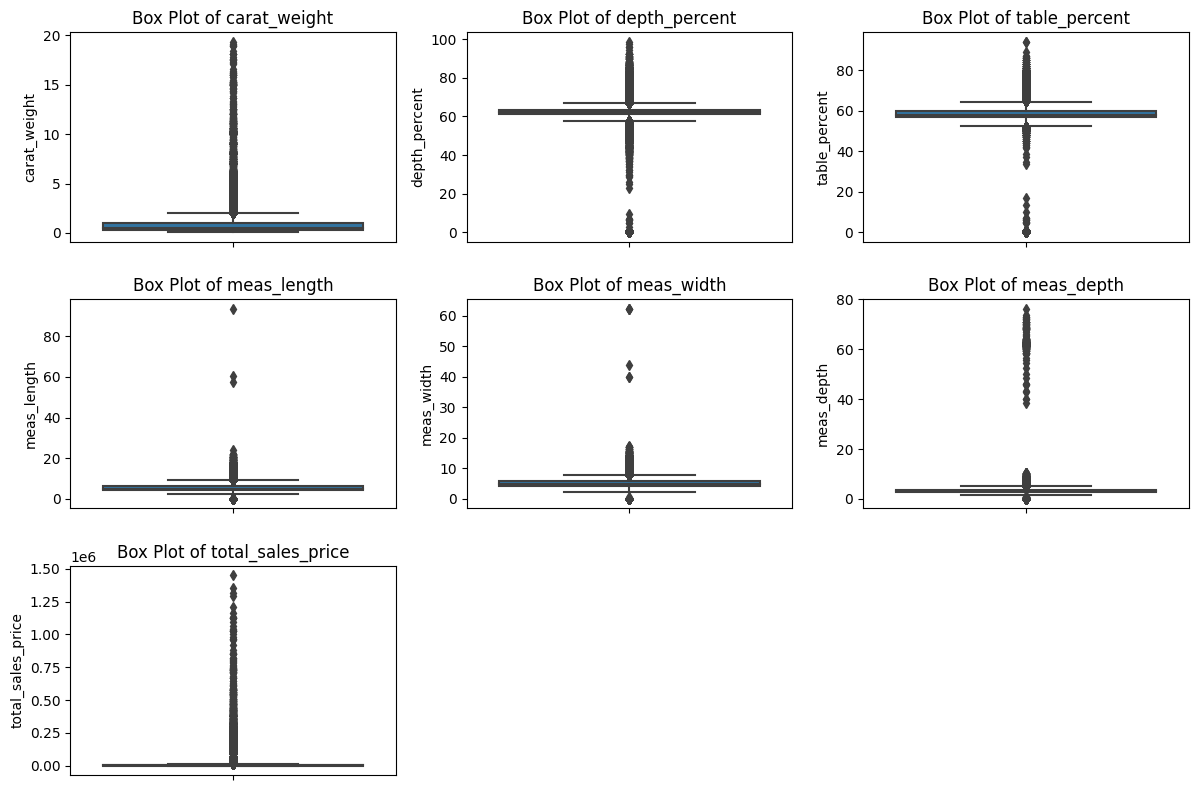

In [23]:
numerical_columns = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

We notice that there are absurd number of outliers in our dataset. Outliers can adversely affect the performance of machine learning models, particularly linear relationships and can introduce noise into the model.

Therefore we drop the outliers which are lesser than Q1 - 1.5 * IQR and larger than Q3 + 1.5 * IQR.

In [24]:
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [25]:
for column in numerical_columns:
    handle_outliers(column)

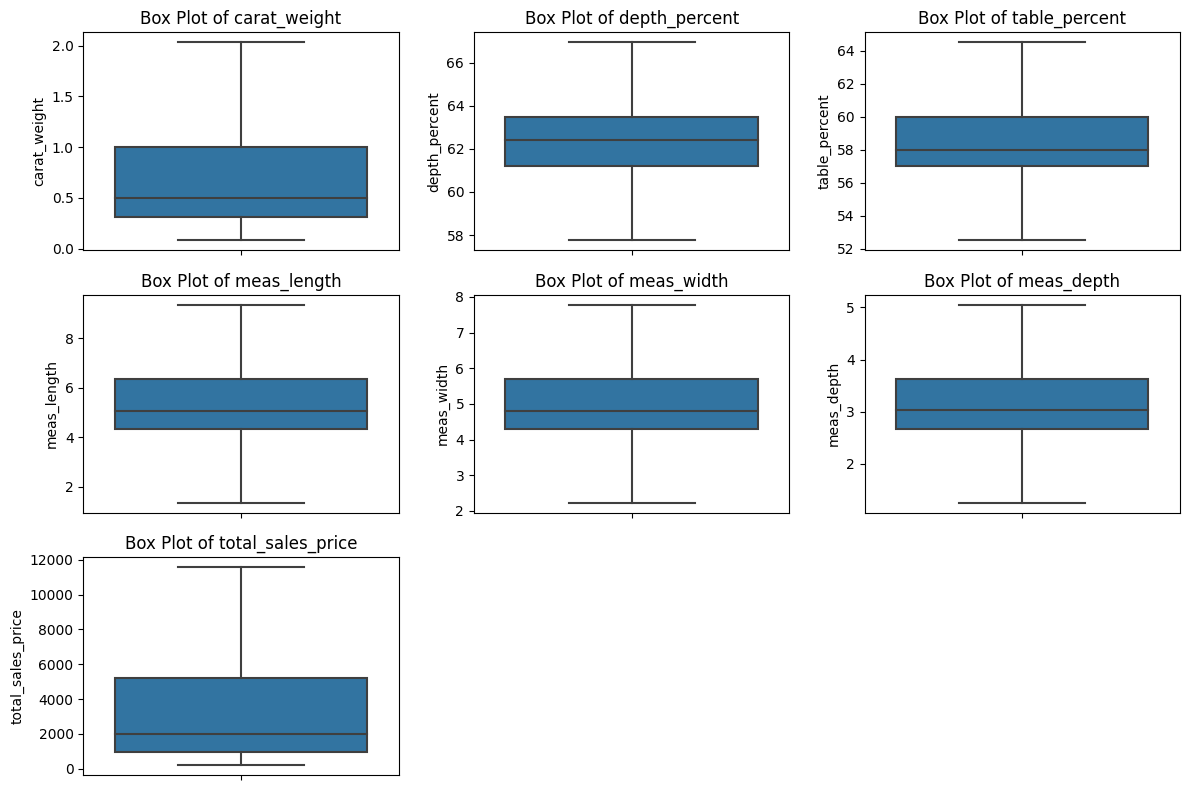

In [26]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

As we can see now there are no outliers.

## Encoding of Variables

In [27]:
df.dtypes

cut                   object
color                 object
clarity               object
carat_weight         float64
lab                   object
symmetry              object
polish                object
depth_percent        float64
table_percent        float64
meas_length          float64
meas_width           float64
meas_depth           float64
total_sales_price    float64
dtype: object

To convert categorical data into a numerical format , we will encode the categorical features.

In [28]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

Since the number of unique categories is very high in categorical columns of our dataset,  One-hot encoding increases the dimensionality of the dataset significantly. Therfore, we used label encoding.

# **Problem 1 : Predicting Sales Price**

Dropping the target variables and plotting correlation heatmap to identify dependant features.

In [29]:
ddf= df.drop('total_sales_price', axis=1)

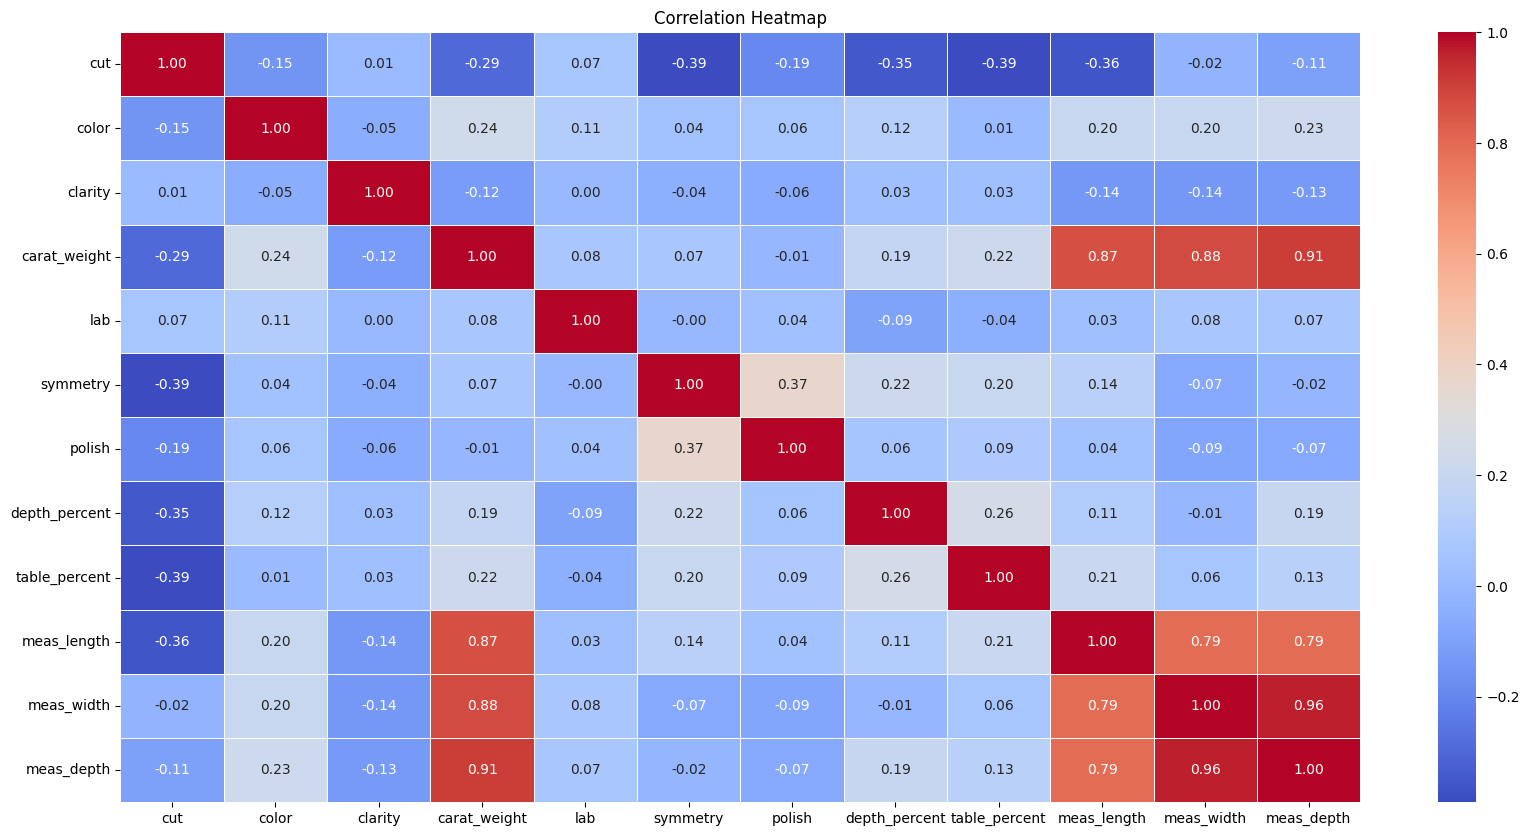

In [30]:
correlation_matrix = ddf.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
df = df.drop('meas_length', axis=1)
df = df.drop('meas_depth', axis=1)
df = df.drop('meas_width', axis=1)

## **Splitting Data**

In [32]:
X = df.drop('total_sales_price', axis=1)
y = df['total_sales_price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After splitting, 20% of the data will be used as the testing set, while the remaining 80% will be used as the training set.

## **Standarizing the features**

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [35]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 821.32
Mean Squared Error (MSE): 1915619.17
R-squared (R2): 0.86


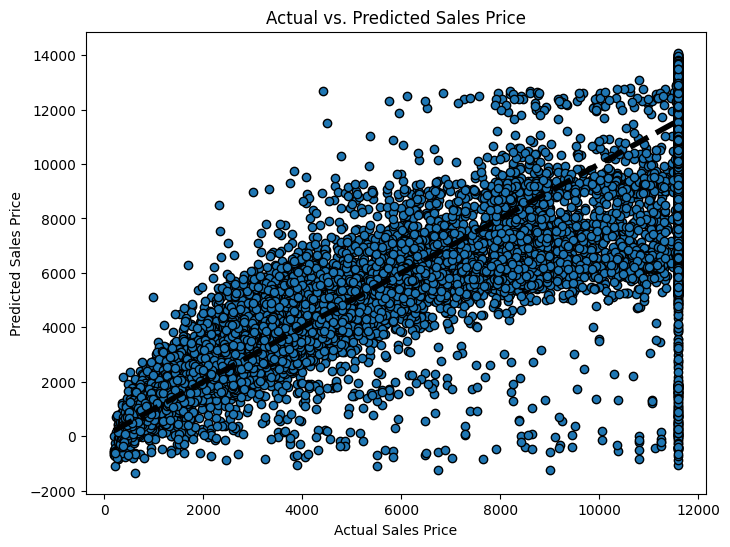

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Actual vs. Predicted Sales Price')
plt.show()

## **Polynomial Regression and Hyperparmater Tuning**

In [38]:
param_grid = {
    'poly__degree': [2, 3, 4, 5]
}

poly_reg = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Polynomial Degree:", best_params['poly__degree'])

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Best Model Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Best Model R-squared (R2): {r2_best:.2f}")

Best Polynomial Degree: 3
Best Model Mean Absolute Error (MAE): 523.64
Best Model Mean Squared Error (MSE): 860107.53
Best Model R-squared (R2): 0.94


## **Random Forest Regression**

In [39]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
y_pred = rf_regressor.predict(X_test_scaled)

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 271.85
Mean Squared Error (MSE): 496850.57
R-squared (R2): 0.96


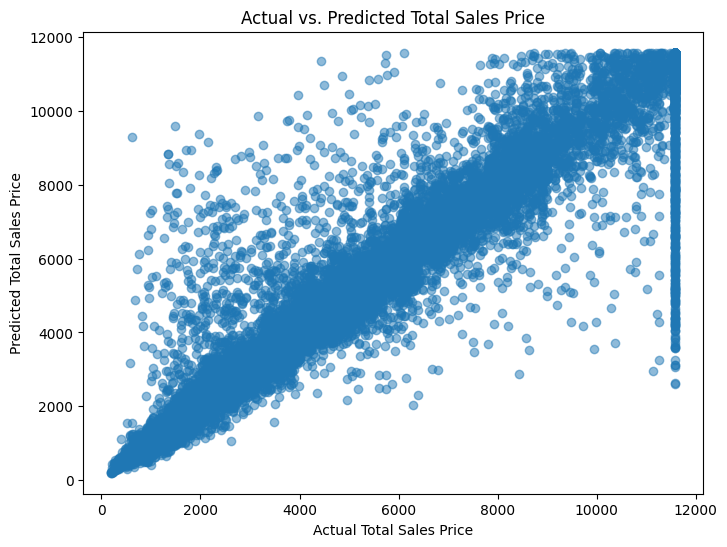

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Total Sales Price")
plt.ylabel("Predicted Total Sales Price")
plt.title("Actual vs. Predicted Total Sales Price")
plt.show()

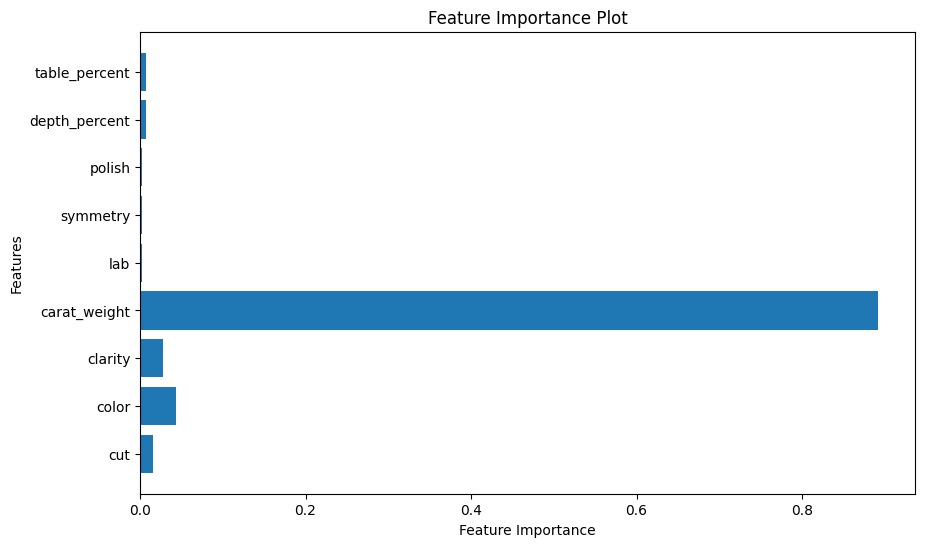

In [42]:
feature_priority = rf_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_priority)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

## **Using 3 most important features**

In [43]:
X = df[["carat_weight", "clarity", "color"]]
y = df["total_sales_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
y_pred = rf_regressor.predict(X_test_scaled)

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 409.55
Mean Squared Error (MSE): 760177.20
R-squared (R2): 0.95


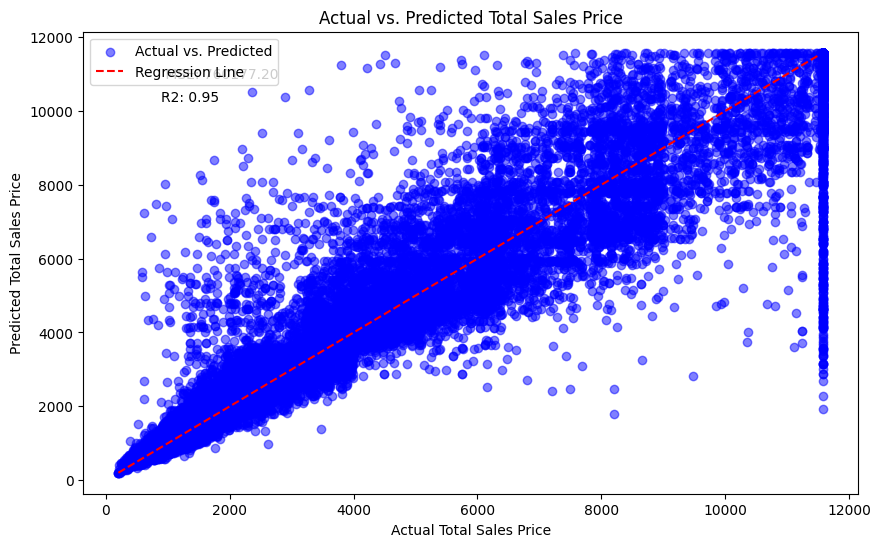

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Actual vs. Predicted')
plt.plot(np.arange(min(y_test), max(y_test), 100), np.arange(min(y_test), max(y_test), 100), color='r', linestyle='--', label='Regression Line')
plt.xlabel('Actual Total Sales Price')
plt.ylabel('Predicted Total Sales Price')
plt.title('Actual vs. Predicted Total Sales Price')
plt.legend(loc='upper left')
plt.text(0.1, 0.9, f' MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f'R2: {r2:.2f}', transform=plt.gca().transAxes)
plt.show()

We can see that among all the models , Random Forest performs the best for predicitng sales price.

# **Problem 2: Predicting Carat Weight**

## **Splitting the data**

In [48]:
X = df.drop(columns=['carat_weight'])
y = df['carat_weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Standarizing the Features**

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Linear Regression**

In [50]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [51]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.03
R-squared (R2): 0.87


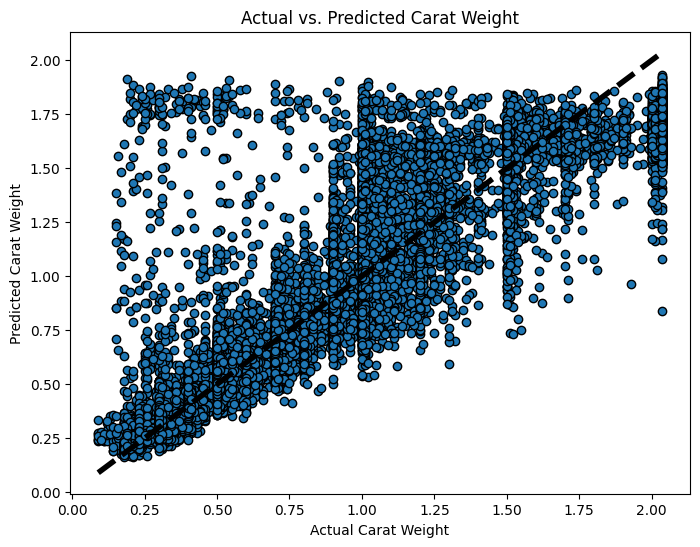

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Carat Weight')
plt.ylabel('Predicted Carat Weight')
plt.title('Actual vs. Predicted Carat Weight')
plt.show()

## **Polynomial Regression and Hyperparamter Tuning**

In [53]:
param_grid = {
    'poly__degree': [2, 3, 4, 5]
}

poly_reg = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Polynomial Degree:", best_params['poly__degree'])

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Best Model Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Best Model R-squared (R2): {r2_best:.2f}")

Best Polynomial Degree: 3
Best Model Mean Absolute Error (MAE): 0.08
Best Model Mean Squared Error (MSE): 0.02
Best Model R-squared (R2): 0.91


## **Random Forest Regression**

In [54]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
y_pred = rf_regressor.predict(X_test_scaled)

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.02
R-squared (R2): 0.92


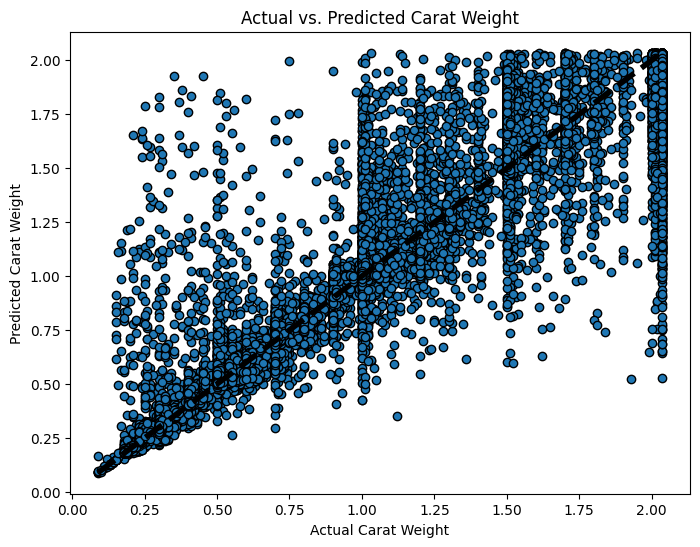

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Carat Weight')
plt.ylabel('Predicted Carat Weight')
plt.title('Actual vs. Predicted Carat Weight')
plt.show()

## **Ridge Regression**

In [57]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge_alpha = 1.0
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train_poly, y_train)
y_ridge_pred = ridge_model.predict(X_test_poly)

In [58]:
mae = mean_absolute_error(y_test, y_ridge_pred)
mse = mean_squared_error(y_test, y_ridge_pred)
r2 = r2_score(y_test, y_ridge_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.03
R-squared (R2): 0.89


In [59]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge_alpha = 1.0
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train_poly, y_train)
y_ridge_pred = ridge_model.predict(X_test_poly)

In [60]:
mae = mean_absolute_error(y_test, y_ridge_pred)
mse = mean_squared_error(y_test, y_ridge_pred)
r2 = r2_score(y_test, y_ridge_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.02
R-squared (R2): 0.91


We can see that among all the models , Random Forest performs the best for predicitng carat weight.

# **Problem 3 : Predicting Total Sales Price per Carat Weight**

## **Splitting the Data**

In [61]:
X = df[['carat_weight']]
y = df['total_sales_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Linear Regression**

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 880.52
Mean Squared Error (MSE): 2063134.74
R-squared (R2): 0.85


In [64]:
carat_weight_to_predict = 1.5
predicted_price = model.predict(np.array([[carat_weight_to_predict]]))
print(f"Predicted total_sales_price for {carat_weight_to_predict} carat(s): {predicted_price[0]}")

Predicted total_sales_price for 1.5 carat(s): 9281.197453936182


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


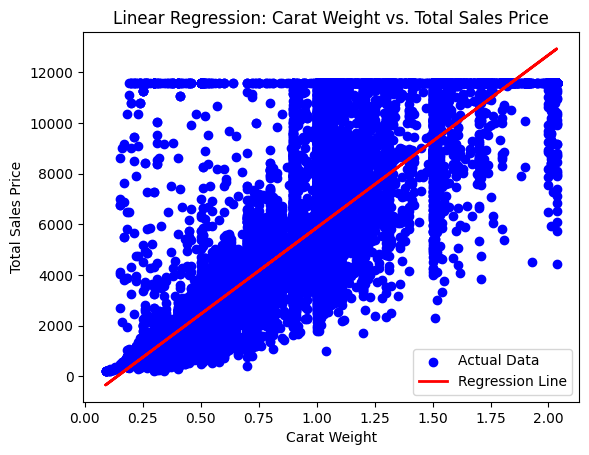

In [65]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Linear Regression: Carat Weight vs. Total Sales Price')
plt.show()

## **Polynomial Regression**

In [66]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 832.17
Mean Squared Error (MSE): 1887963.54
R-squared (R2): 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


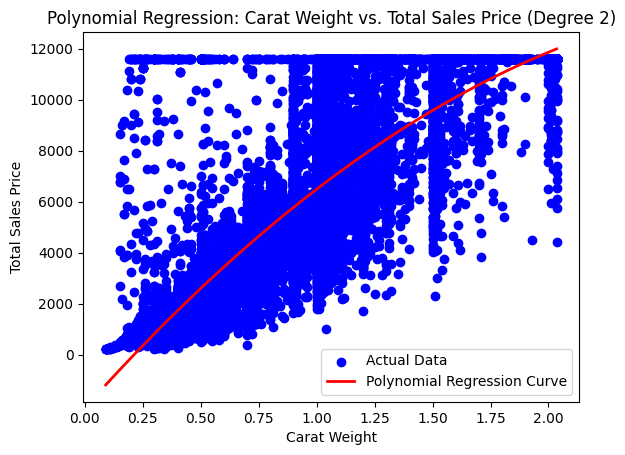

In [67]:
X_sorted = np.sort(X_test.values, axis=0)
y_poly_pred = model.predict(poly.transform(X_sorted))

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression: Carat Weight vs. Total Sales Price (Degree 2)')
plt.show()

In [68]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

In [69]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 712.35
Mean Squared Error (MSE): 1711743.45
R-squared (R2): 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


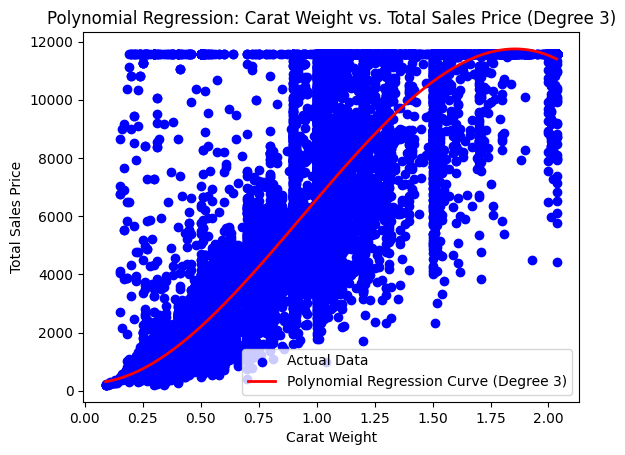

In [70]:
X_sorted = np.sort(X_test.values, axis=0)
y_poly_pred = model.predict(poly.transform(X_sorted))

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_pred, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 3)')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression: Carat Weight vs. Total Sales Price (Degree 3)')
plt.show()

## **Ridge Regression**

In [71]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_alpha = 1.0
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train_poly, y_train)
y_pred = ridge_model.predict(X_test_poly)

In [72]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 832.14
Mean Squared Error (MSE): 1887961.24
R-squared (R2): 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


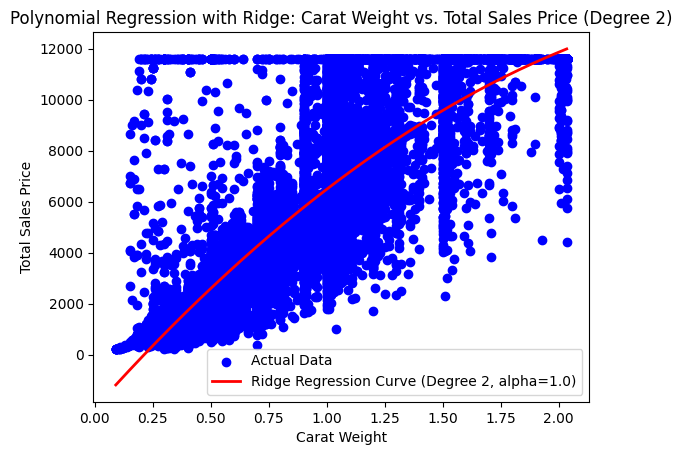

In [73]:
X_sorted = np.sort(X_test.values, axis=0)
y_poly_ridge_pred = ridge_model.predict(poly.transform(X_sorted))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_ridge_pred, color='red', linewidth=2, label=f'Ridge Regression Curve (Degree 2, alpha={ridge_alpha})')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression with Ridge: Carat Weight vs. Total Sales Price (Degree 2)')
plt.show()

## **Lasso Regression**

In [74]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lasso_alpha = 1.0
lasso_model = Lasso(alpha=lasso_alpha)
lasso_model.fit(X_train_poly, y_train)
y_pred = lasso_model.predict(X_test_poly)

In [75]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 831.70
Mean Squared Error (MSE): 1888052.16
R-squared (R2): 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


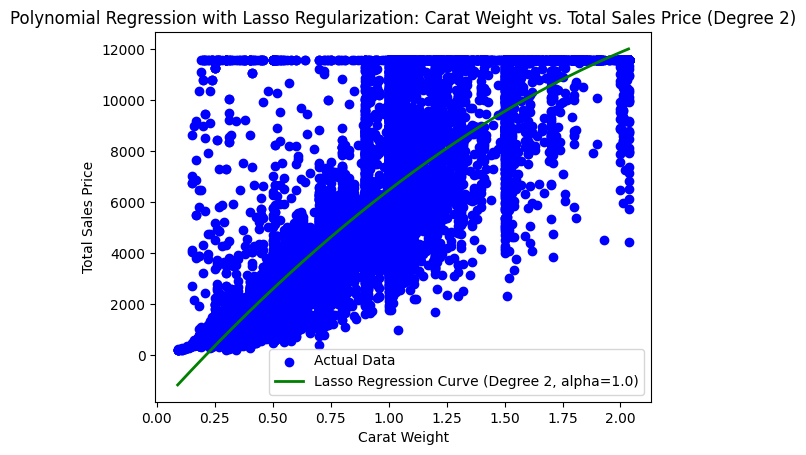

In [76]:
X_sorted = np.sort(X_test.values, axis=0)
y_poly_ridge_pred = ridge_model.predict(poly.transform(X_sorted))
y_poly_lasso_pred = lasso_model.predict(poly.transform(X_sorted))

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_lasso_pred, color='green', linewidth=2, label=f'Lasso Regression Curve (Degree 2, alpha={lasso_alpha})')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression with Lasso Regularization: Carat Weight vs. Total Sales Price (Degree 2)')
plt.show()

There is almost no difference **before** and **after** applying Regularization Parameter on 2nd degree linear regression model, by this we can confidently say that our model is accurate and is perfectly fitted.